# Tutorial: Access Distributed NASA Earth Science Data from OPeNDAP Services using Python
## Analyze the difference of radiation between January and July
*Author: ORNL DAAC*
<br>
*Date: March 9, 2018*
<br>
*Contact for [ORNL DAAC](https://daac.ornl.gov/): uso@daac.ornl.gov*

##### Keywords: OPeNDAP, THREDDS, Python,climatology, radiation

## Overview
In this tutorial, we will explore how to use ORNL DAAC data from THREDDS Data Server through OPeNDAP protocol using python. THREDDS is a web server that provides direct access to scientific data sets and OPeNDAP is a protocol that allows access to remote data without having to download the data. This example uses spatial subset of data from the mean radiation variable of a global 30-year monthly climatology dataset. Python pydap module is used to access the data on THREDDS through OPenDAP protocol. The mean monthly radiation data is read and its attributes, dimensions and size are retrieved. Two subsets of radiation data in January and July are created, and the difference of radiation between these two months is calculated and plotted on map.  
![](image/opendap.png)

## Source Data
Spatial and temporal subsets of mean monthly surface climate over global land areas, excluding Antarctica. In this example, radiation data is obtained from [this ORNL DAAC's THREDDS server.](https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/542/catalog.html?dataset=542/climate6190_RAD.nc4) 

## Prerequisites:
Python 2.7 or greater. Python modules: `pydap`, `basemap`, `matplotlib`, `numpy`

## Procedure

### 1. Load python modules: pydap, basemap, numpy, and matplotlib
Let's import all the libraries that we will need. Run the following cell

In [1]:
%matplotlib inline
from pydap.client import open_url          # pydap package
from mpl_toolkits.basemap import Basemap   # plotting data on map
import numpy as np                         # numerical processing
import matplotlib.pyplot as plt            # base plotting package

If the following cell does not execute correctly, then you need to install any package that is missing as seen in the error message. For example, you may need to install basemap or pydap. Depending upon which Python environment and Python version you are using, you can install these packages with commands such as:

+ pip install pydap
or
+ conda install pydap
or 
+ conda install -c conda-forge pydap

After install all required packages, run the cell above again.

### 2. Define spatial extent of your interest (CONUS)

In [2]:
# BBOX for CONUS
west = -124.848974
south = 24.396308
east = -66.885444
north = 49.384358

# BBOX for North America
#west = -170.0
#south = 20.0
#east = -50.0
#north = 80.0

### 3. Connect to a climatology dataset on the ORNL DAAC THREDDS Data Server through OPeNDAP protocal and list its variables

Go to the [THREDDS Catalog page.](https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/542/catalog.html?dataset=542/climate6190_RAD.nc4) of data in web browser and access the data using OPeNDAP url. Achieve the OPeNDAP data url by clicking the link after OPENDAP on data Catalog page.![](image/THREDDS.PNG)

A new page of OPeNDAP Dataset Access Form will be opened. Copy the url of OPeNDAP Dataset Access Form and remove the '.html' from copied url.![](image/url.PNG)

In [3]:
data = open_url("https://thredds.daac.ornl.gov/thredds/dodsC/ornldaac/542/climate6190_RAD.nc4")       # access data
data.keys()

['RAD', 'lat', 'climatology_bounds', 'lat_bnds', 'lon_bnds', 'time', 'lon']

### 4. Check attributes of radiation variable 'RAD'

In [4]:
var= 'RAD'     # define variable name
data[var].attributes

{'_ChunkSizes': [6, 180, 360],
 '_FillValue': -9999,
 'cell_methods': 'time: mean within months time: mean over years',
 'long_name': 'Radiation',
 'units': 'w/m2',
 'valid_range': [0, 1000]}

### 5. Check dimensions of radiation variable 'RAD'

In [5]:
data[var].array.dimensions

('time', 'lat', 'lon')

### 6. Check size of radiation variable 'RAD'

In [6]:
data[var].array.shape

(12, 360, 720)

### 7. Find out indices for the spatial extent of your interest

#### 7.1. Retrieve latitudes

In [7]:
lats = data.lat[:]
lats

array([-89.75, -89.25, -88.75, -88.25, -87.75, -87.25, -86.75, -86.25,
       -85.75, -85.25, -84.75, -84.25, -83.75, -83.25, -82.75, -82.25,
       -81.75, -81.25, -80.75, -80.25, -79.75, -79.25, -78.75, -78.25,
       -77.75, -77.25, -76.75, -76.25, -75.75, -75.25, -74.75, -74.25,
       -73.75, -73.25, -72.75, -72.25, -71.75, -71.25, -70.75, -70.25,
       -69.75, -69.25, -68.75, -68.25, -67.75, -67.25, -66.75, -66.25,
       -65.75, -65.25, -64.75, -64.25, -63.75, -63.25, -62.75, -62.25,
       -61.75, -61.25, -60.75, -60.25, -59.75, -59.25, -58.75, -58.25,
       -57.75, -57.25, -56.75, -56.25, -55.75, -55.25, -54.75, -54.25,
       -53.75, -53.25, -52.75, -52.25, -51.75, -51.25, -50.75, -50.25,
       -49.75, -49.25, -48.75, -48.25, -47.75, -47.25, -46.75, -46.25,
       -45.75, -45.25, -44.75, -44.25, -43.75, -43.25, -42.75, -42.25,
       -41.75, -41.25, -40.75, -40.25, -39.75, -39.25, -38.75, -38.25,
       -37.75, -37.25, -36.75, -36.25, -35.75, -35.25, -34.75, -34.25,
      

#### 7.2. Retrieve longitudes 

In [8]:
lons = data.lon[:]
lons

array([-179.75, -179.25, -178.75, -178.25, -177.75, -177.25, -176.75,
       -176.25, -175.75, -175.25, -174.75, -174.25, -173.75, -173.25,
       -172.75, -172.25, -171.75, -171.25, -170.75, -170.25, -169.75,
       -169.25, -168.75, -168.25, -167.75, -167.25, -166.75, -166.25,
       -165.75, -165.25, -164.75, -164.25, -163.75, -163.25, -162.75,
       -162.25, -161.75, -161.25, -160.75, -160.25, -159.75, -159.25,
       -158.75, -158.25, -157.75, -157.25, -156.75, -156.25, -155.75,
       -155.25, -154.75, -154.25, -153.75, -153.25, -152.75, -152.25,
       -151.75, -151.25, -150.75, -150.25, -149.75, -149.25, -148.75,
       -148.25, -147.75, -147.25, -146.75, -146.25, -145.75, -145.25,
       -144.75, -144.25, -143.75, -143.25, -142.75, -142.25, -141.75,
       -141.25, -140.75, -140.25, -139.75, -139.25, -138.75, -138.25,
       -137.75, -137.25, -136.75, -136.25, -135.75, -135.25, -134.75,
       -134.25, -133.75, -133.25, -132.75, -132.25, -131.75, -131.25,
       -130.75, -130

#### 7.3. Calculate indices

In [9]:
idx_west = np.argmin(np.abs(lons - west))
idx_south = np.argmin(np.abs(lats - south))
idx_east = np.argmin(np.abs(lons - east))
idx_north = np.argmin(np.abs(lats - north))
print (idx_west, idx_south, idx_east, idx_north)

110 228 226 278


### 8. Retrieve subsets of the radiation data in January and July for CONUS. Calculate the radiation difference between July and January

In [10]:
rad_na_jan = data[var][0,idx_south:idx_north,idx_west:idx_east]  # Retrieve subsets of the radiation data in January for CONUS 
lats_subset = rad_na_jan.lat[:]                                  # Retrive the spatial latitude range to prepare for plot
lons_subset = rad_na_jan.lon[:]                                  # Retrive the spatial longitude range to prepare for plot
rad_na_jan = np.ma.masked_where(rad_na_jan[var]==data[var]._FillValue, rad_na_jan[var])
rad_na_jul = data[var][6,idx_south:idx_north,idx_west:idx_east]  # Retrieve subsets of the radiation data in July for CONUS
rad_na_jul = np.ma.masked_where(rad_na_jul[var]==data[var]._FillValue, rad_na_jul[var]) 

rad_na_diff=rad_na_jul-rad_na_jan                                # Calculate the radiation difference between July and January

### 9. Plot the radiation difference on a map

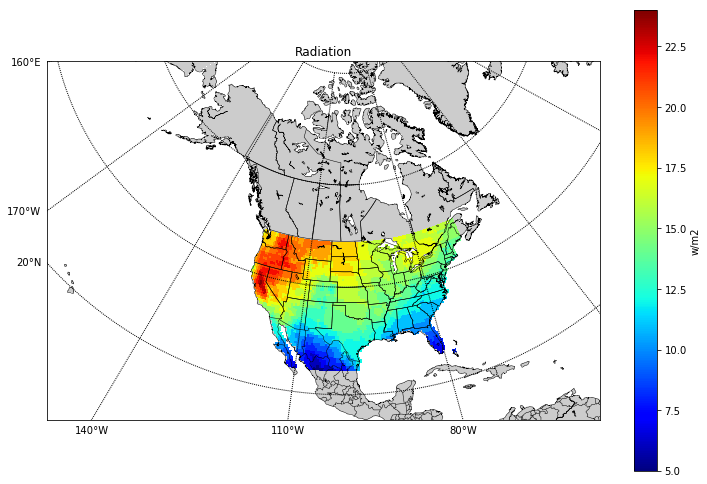

In [11]:
fig = plt.figure(figsize=(12,8))                                 # create the figure and axes instances
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])                          
m = Basemap(llcrnrlon=-145.5,                                    # setup of basemap
                    llcrnrlat=1.,                               
                    urcrnrlon=-2.566,
                    urcrnrlat=46.352,
                    rsphere=(6378137.00,6356752.3142),
                    resolution='l',
                    area_thresh=1000.,
                    projection='lcc',
                    lat_1=50.,
                    lon_0=-100.,
                    ax=ax)
X, Y = m(*np.meshgrid(lons_subset, lats_subset))
Z = np.mean(rad_na_diff, axis=0)
colors = m.pcolor(X, Y, Z,cmap='jet')
cb = plt.colorbar(colors)                                        # add colorbar
cb.set_label(data[var].units)                                    # add units
m.drawlsmask()                                                   # draw a land-sea mask
m.drawcoastlines(linewidth=0.5)                                  # draw coastlines and political boundaries.
m.drawcountries()
m.drawstates()
parallels = np.arange(0.,80,20.)                                 # draw parallels and meridians.label on left and bottom of map.
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])                      
ax.set_title(data[var].long_name)                                # add title                               
plt.show()